<div align="center">

# Prédiction de la souscription d'un dépôt à terme  

## Exploration des données

<img src="https://raw.githubusercontent.com/komiadok/termdepositforecast/main/cover_image.jpg" width="500"/>

</div>

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
📚 Chargement des librairies
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🗃️ Partie 1 : Importation des données
</div>

In [2]:
# Chargement du dataset
data = pd.read_csv('../data/raw/bank-additional-full.csv', sep = ';')
print(f'Taille du dataframe : {data.shape}')

# Aperçu du dataset
data.head()

Taille du dataframe : (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Détail sur les colonnes du dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Observation**

Le DataFrame se compose de 21 variables réparties comme suit :

| Type de variable         | Nombre | Détails                                                                                                         |
|--------------------------|--------|-----------------------------------------------------------------------------------------------------------------|
| **Entières**             | 5      | `age`, `duration`, `campaign`, `pdays`, `previous`                                                              |
| **Décimales**            | 5      | `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`                                   |
| **Catégorielles (objet)**| 11     | `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome`, `y` |

Nous avons également l'information que le DataFrame ne contient pas de données nulles explicites : None ou np.nan.

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🔍 Partie 2 : Focus sur chaque variable
</div>

### Variables entières

In [4]:
# Résumé des données
data[['age', 'duration', 'campaign', 'pdays', 'previous']].describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


**Interprétation**

1. **age**
   
    La variable `age`, qui correspond à l'âge des clients prospectés, présente des valeurs comprises entre **17 et 98 ans**. Cette distribution met en évidence une anomalie : les clients de moins de 18 ans ne devraient pas figurer dans ce jeu de données, la réglementation interdisant aux mineurs d’ouvrir un dépôt à terme. Ces observations nécessitent une analyse approfondie afin d’identifier la source de l’erreur (saisie, intégration ou qualité de données).<br> Par ailleurs, la moyenne d’âge est de **40 ans**, avec un premier quartile situé à **32 ans**, ce qui indique que la majorité des clients prospectés appartiennent à une tranche d’âge active, généralement en emploi.

2. **duration**

    La variable `duration`, qui mesure la durée du dernier appel passé avec le client, présente une forte dispersion, avec des valeurs comprises entre **0 seconde et 4 918 secondes** (soit plus d’une heure).<br> Les appels de **0 seconde** traduisent probablement des situations où le client n’a pas décroché, ce qui reste cohérent dans le cadre d’une campagne téléphonique. En revanche, la présence de nombreuses durées très élevées constitue une anomalie. Dans un contexte de prospection commerciale, les appels sont généralement encadrés par des pratiques professionnelles et réglementaires, et ne devraient pas dépasser **5 minutes (300 secondes)**.<br> Or, l’analyse statistique met en évidence que **25 % des appels dépassent ce seuil des 5 minutes**, ce qui révèle un problème de qualité des données ou d’enregistrement.<br> La variable `duration` nécessite un traitement spécifique avant toute modélisation, afin de limiter l’influence de ces valeurs extrêmes et de garantir une analyse conforme aux conditions réelles d’une campagne marketing.

3. **campaign**

    La variable `campaign`, qui fait référence au nombre d'appels passés au client au cours de la campagne marketing, présente des valeurs comprises entre **1 et 56**.<br> Cette distribution révèle une anomalie notable : les pratiques professionnelles et réglementaires ne permettent généralement pas de relancer un client plus de **5 fois** dans le cadre d'une campagne marketing. La présence de valeurs aussi élevées que **56** suggère donc une **erreur de saisie ou d'enregistrement**.<br> La majorité des observations se concentre toutefois entre **1 et 3 appels**, ce qui est cohérent avec les standards habituels de prospection.

4. **pdays**

    La variable `pdays`, qui indique le nombre de jours écoulés depuis le dernier contact avec le client, présente des valeurs comprises entre **0 et 999 jours**.<br> Nous observons que plus de **75 %** des observations sont égales à **999**, ce qui pourrait initialement sembler anormal. Cependant, dans ce dataset, la valeur **999 est utilisée comme code symbolique** pour indiquer que le client n’a jamais été contacté auparavant.<br> Cette répartition montre que la campagne a ciblé majoritairement des nouveaux clients, ce qui est cohérent avec l’objectif de prospection marketing.

5. **previous**

    La variable `previous`, qui indique le nombre d'appels passés au client lors de la campagne marketing précédente, est majoritairement composée de **0**, ce qui est cohérent avec l’analyse de la variable `pdays` : la campagne a principalement ciblé des nouveaux clients, jamais contactés auparavant.<br> Toutefois, certaines valeurs dépassent les normes habituelles des pratiques professionnelles et réglementaires. En effet, nous avons identifié des clients ayant reçu jusqu’à **7 appels**, alors que la norme limite le nombre de relances à **5 appels par campagne**.

### Variables décimales

In [5]:
# Résumé des données
data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Interprétation**

1. **emp.var.rate**

    La variable `emp.var.rate` correspond au taux de variation trimestriel de l’emploi par rapport au trimestre précédent, mesuré au moment de l’enregistrement du client. La campagne s’étendant de **mai 2008 à novembre 2010**, période marquée par des crises économiques majeures, explique les valeurs de cette variable qui se situent entre **-3,4 et 1,4**. Les épisodes de turbulences financières, notamment la chute significative des marchés boursiers, ont entraîné une contraction de l’emploi, se traduisant par des taux négatifs, tandis que les phases de reprise ont permis un retour progressif à des taux positifs.
   
2. **cons.price.idx**

    La variable `cons.price.idx` représente l’indice des prix à la consommation (IPC) pour le mois correspondant à l’enregistrement du client. Sur la période **mai 2008 – novembre 2010**, les valeurs de l’IPC se situent entre **92,20 et 94,77**, traduisant une légère hausse globale. Néanmoins, cette évolution reste modérée, indiquant que les prix sont restés relativement stables tout au long de la période.
   
3. **cons.conf.idx**

    La variable `cons.conf.idx` correspond à l’indice de confiance des consommateurs, reflétant le sentiment général des clients à l’égard de la situation économique pour le mois d’enregistrement. Sur la période de la campagne, ses valeurs varient entre **-50,80 et -26,90**, indiquant que la majorité des clients perçoivent l’économie de manière défavorable. Ce sentiment pessimiste est cohérent avec les crises économiques mondiales survenues entre **mai 2008 et novembre 2010** et peut influencer leur propension à souscrire à un dépôt à terme, la confiance étant un facteur clé dans la prise de décision financière.
    
4. **euribor3m**

    La variable `euribor3m` correspond au **taux interbancaire de référence Euribor à 3 mois**, c’est-à-dire le taux auquel les grandes banques de la zone euro se prêtent des fonds sur une période de trois mois. Cet indicateur est largement utilisé comme référence pour le calcul des intérêts de divers produits financiers, tels que les crédits immobiliers ou les dépôts à terme. Dans le jeu de données, la valeur enregistrée correspond au taux en vigueur le jour du contact avec le client.<br> Sur la période étudiée, le taux fluctue entre **0,63 % et 5,05 %**. La majorité des enregistrements présentent des niveaux supérieurs à **3 %**, reflétant un contexte de coûts d’emprunt relativement élevés, ce qui a pu influencer à la fois la demande de crédits et l’attractivité des produits d’épargne tels que les dépôts à terme.

5. **nr.employed**

    La variable `nr.employed` correspond au nombre de personnes actives (population en emploi) au cours du trimestre associé à l’enregistrement du client. Sur la période étudiée, cet indicateur varie entre **4 963 600 et 5 228 100 personnes**. La majorité des observations se situent autour de **5 millions d’actifs**, ce qui traduit une stabilité relative du marché du travail malgré les turbulences économiques de **2008–2010**. Les valeurs apparaissent globalement homogènes, suggérant que l’emploi, bien qu’affecté par la crise, a évolué de manière moins volatile que d’autres indicateurs macroéconomiques tels que `emp.var.rate` ou `euribor3m`.

### Variables catégorielles

In [6]:
# Définition du chemin où se trouve utils
import sys
sys.path.append('../')  

# Importation des fonctions à utiliser
from utils import plot_horizontal_bar, plot_pie_chart

#### job

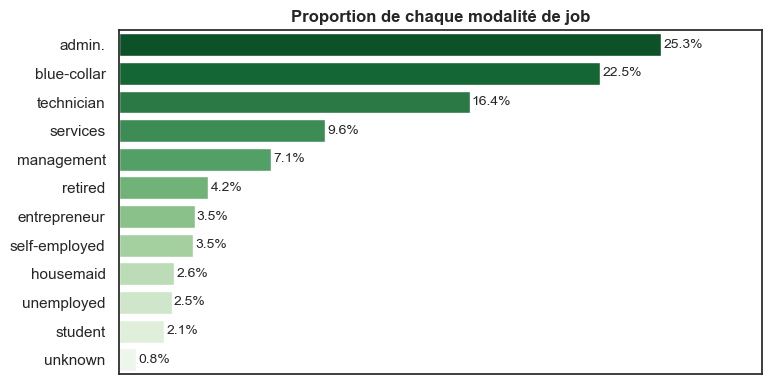

In [7]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(8, 4))

# Construction du diagramme à barres
plot_horizontal_bar(ax, data, 'job', 'Proportion de chaque modalité de job')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.3)           # limites de l'axe X de 0 à 0.3 (0% à 30%)

# Affichage du graphique
plt.show()

**Interprétation**

a variable `job` correspond au type de profession déclaré par les clients et comporte **12 modalités distinctes**. Parmi celles-ci, la modalité `unknown` indique que le client a choisi de ne pas renseigner sa profession, constituant ainsi une **donnée manquante implicite**. Cette catégorie représente la plus faible proportion du dataset, avec environ **0,8 %** des clients (soit environ **330 individus**), juste après la modalité `student` qui regroupe **2,1 % des clients**.<br> La modalité `admin.`, correspondant aux métiers de l’administration, est la plus fréquente avec **25,3 %** des clients prospectés, suivie par `blue-collar` (ouvriers) avec **22,5 %**. Cette distribution permet d’identifier les segments professionnels prédominants dans la population ciblée par la campagne.

#### marital

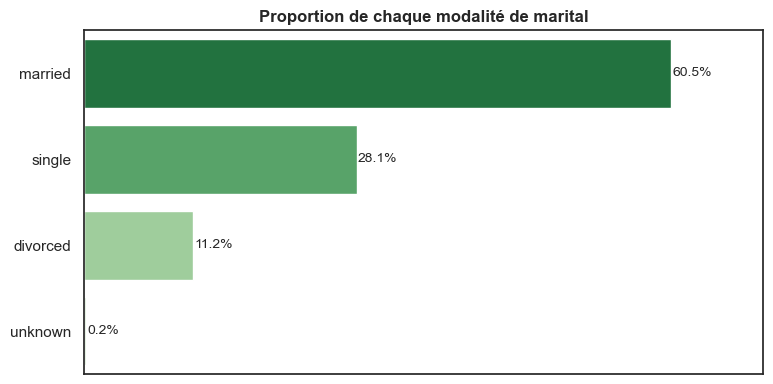

In [8]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(8, 4))

# Construction du diagramme à barres
plot_horizontal_bar(ax, data, 'marital', 'Proportion de chaque modalité de marital')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.7)           # limites de l'axe X de 0 à 0.7 (0% à 70%)

# Affichage du graphique
plt.show()

**Interprétation**

La variable `marital` fait référence à la situation matrimoniale des clients. Elle comporte quatre modalités. Parmi elles, nous avons la modalité `unknown` qui indique l'absence de réponse et constitue une **donnée manquante implicite**, représentant la modalité la moins fréquente avec **0,2 % des clients soit 82 individus**.<br> Parmi les modalités renseignées, la situation matrimoniale la plus fréquente est `married` (les mariés), regroupant **60,5 % des clients**, suivie par `single` (célibataires) avec **28,1 %**. Les clients divorcés (`divorced`) complètent la répartition avec **11,2 %**. Cette distribution met en évidence la prédominance des clients mariés dans la population ciblée par la campagne.

#### education

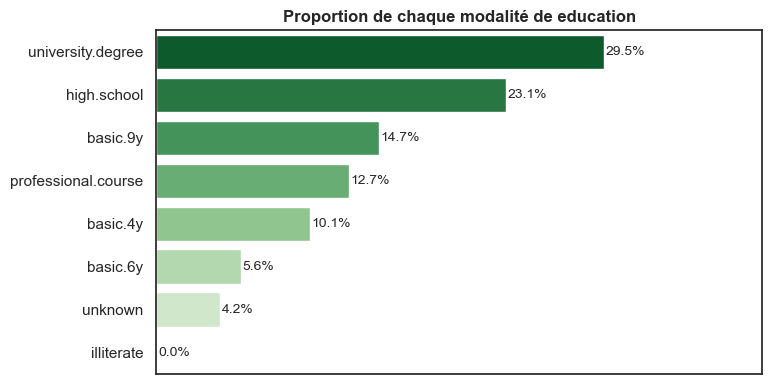

In [9]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(8, 4))

# Construction du diagramme à barres
plot_horizontal_bar(ax, data, 'education', 'Proportion de chaque modalité de education')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.4)           # limites de l'axe X de 0 à 0.4 (0% à 40%)

# Affichage du graphique
plt.show()

**Interprétation**

La variable `education` correspond au niveau d'études déclaré par les clients et comporte huit modalités. Parmi celles-ci, la modalité `unknown` regroupe les clients n’ayant pas souhaité renseigner leur niveau d’études, représentant **4,2 %** de l’échantillon (soit environ **1 730 individus**). Toutefois, ce n’est pas la modalité la moins fréquente : la catégorie `illiterate` (analphabètes) affiche une proportion quasi nulle, traduisant une très faible représentation de ce profil dans le dataset.<br> Concernant la distribution des niveaux d’études, les clients ayant suivi un cursus universitaire (`university.degree`) sont les plus nombreux avec **29,5 %**, suivis par les lycéens (`high.school`) qui représentent **23,1 %**. Cette répartition met en évidence la forte proportion de clients ayant atteint un niveau d’éducation relativement élevé au sein de la population prospectée.

#### default

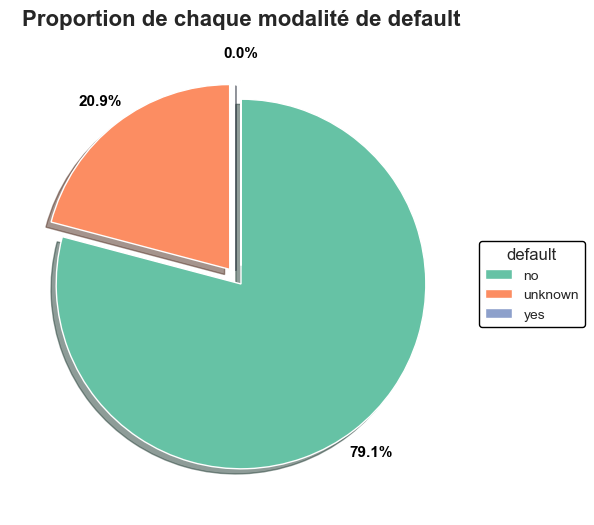

In [10]:
plot_pie_chart(data, 'default', 'Proportion de chaque modalité de default', explode_cats=['unknown', 'yes'])

**Interprétation**

La variable `default` indique si un client présente un défaut de paiement sur un crédit et comprend trois modalités. La modalité `unknown` correspond aux clients n’ayant pas souhaité se prononcer et constitue donc une **donnée manquante implicite**, représentant une **proportion significative** de **20,9 %** des enregistrements. Cette proportion élevée justifie une **attention particulière** lors de l’analyse.<br> La modalité `no`, correspondant aux clients **sans défaut de paiement**, est la plus fréquente, regroupant **79,1 %** des clients (environ **32 580 individus**). En revanche, la proportion de clients ayant effectivement un défaut de paiement (`yes`) est **quasi nulle**, reflétant un échantillon très majoritairement composé de clients solvables.

#### housing

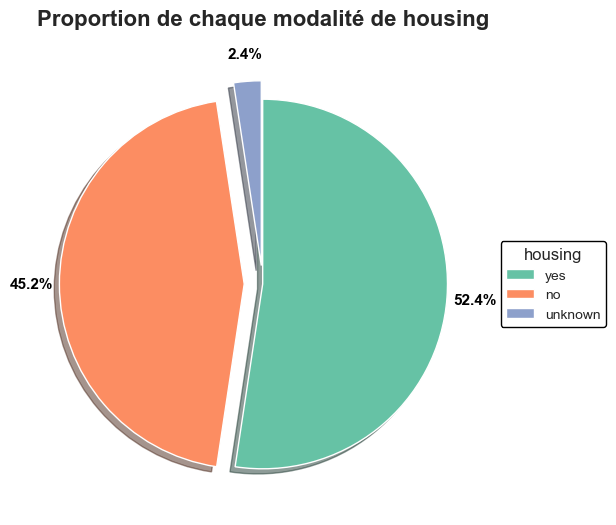

In [11]:
plot_pie_chart(data, 'housing', 'Proportion de chaque modalité de housing', explode_cats=['unknown', 'no'])

**Interprétation**

La variable `housing` indique si un client détient un **prêt immobilier** et comporte **trois modalités**. La modalité `unknown`, correspondant aux clients n’ayant pas souhaité répondre, constitue une **donnée manquante implicite**. Elle est la moins fréquente des trois, représentant seulement **2,4 % des clients** (soit environ **988 individus**).<br> La modalité `yes` est la plus courante, avec **52,4 %** des clients, tandis que la modalité `no` regroupe **45,2 %** des observations. Cette répartition relativement équilibrée entre les clients disposant d’un prêt immobilier et ceux qui n’en détiennent pas met en évidence une population hétérogène sur ce critère, avec une légère prédominance des emprunteurs immobiliers.

#### loan

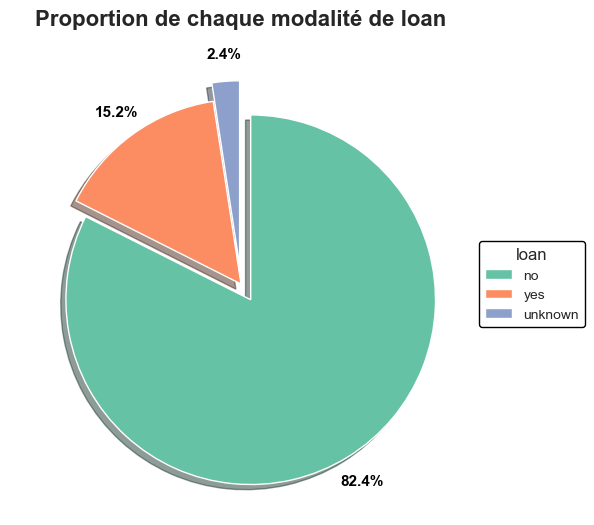

In [12]:
plot_pie_chart(data, 'loan', 'Proportion de chaque modalité de loan', explode_cats=['unknown', 'no'])

**Interprétation**

La variable `loan` indique si un client détient un prêt personnel et comprend trois modalités. La modalité `unknown`, qui correspond aux clients n’ayant pas souhaité répondre, constitue une **donnée manquante implicite**. Elle représente **2,4 %** des enregistrements, soit une proportion relativement faible.<br> La modalité `no` est largement prédominante, regroupant **82,4 %** des clients, tandis que la modalité `yes` concerne seulement **15,2 %** de la population. Cette distribution met en évidence que la grande majorité des clients prospectés ne sont pas engagés dans un prêt personnel, ce qui peut constituer un levier favorable pour la commercialisation de produits financiers supplémentaires, notamment les dépôts à terme.

#### contact

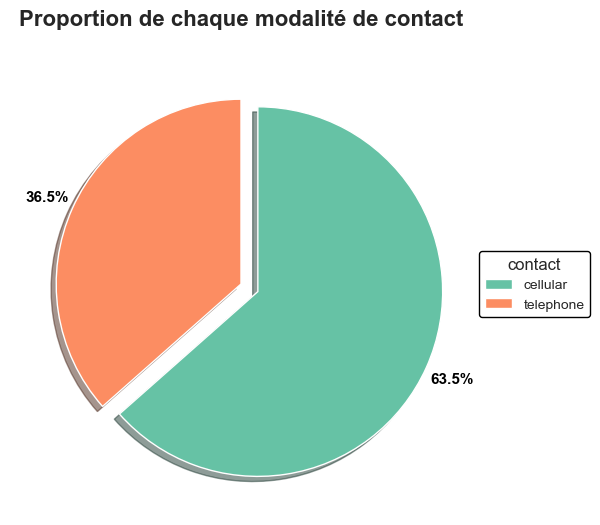

In [13]:
plot_pie_chart(data, 'contact', 'Proportion de chaque modalité de contact', explode_cats=['cellular'])

**Interprétation**

La variable `contact` précise le moyen de communication fourni par les clients au cours de la campagne. Elle comporte deux modalités : `telephone` et `cellular`.<br> La modalité `cellular` (téléphone portable) est la plus représentée, avec **63,5 %** des enregistrements, contre **36,5 %** pour la modalité `telephone` (téléphone fixe). Cette distribution traduit une préférence croissante pour l’usage du téléphone portable chez les clients dans les campagnes marketing, reflet de l’évolution des pratiques de communication à la fin des années 2000.

#### month

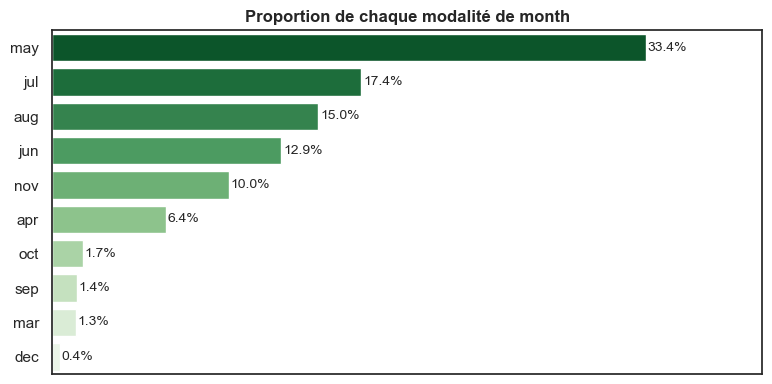

In [14]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(8, 4))

# Construction du diagramme à barres
plot_horizontal_bar(ax, data, 'month', 'Proportion de chaque modalité de month')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.4)           # limites de l'axe X de 0 à 0.4 (0% à 40%)

# Affichage du graphique
plt.show()

**Interprétation**

La variable `month` indique le mois au cours duquel le client a été contacté. Elle comporte 10 modalités, ce qui montre que la campagne n’a pas été menée en continu sur l’ensemble de l’année. En particulier, les mois de **janvier** et **février** n’ont enregistré aucune activité de prospection, bien que la campagne se soit globalement déroulée entre mai 2008 et novembre 2010.<br> La distribution révèle que le mois de **mai** est celui où les clients ont été le plus sollicités, représentant **33,4 %** des contacts, suivi par le mois de **juillet** avec **17,4 %**. À l’inverse, le mois de **décembre** enregistre la proportion la plus faible, avec seulement **0,4 %** des clients contactés. Cette répartition suggère une forte concentration des actions marketing au printemps et en été, périodes probablement jugées plus favorables à la prospection.

#### day_of_week

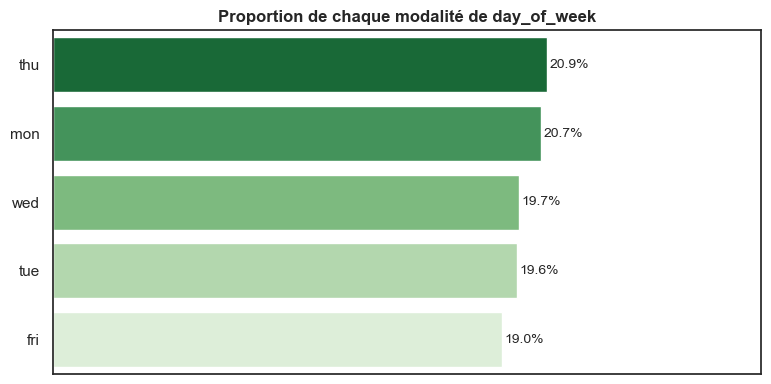

In [15]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(8, 4))

# Construction du diagramme à barres
plot_horizontal_bar(ax, data, 'day_of_week', 'Proportion de chaque modalité de day_of_week')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.3)           # limites de l'axe X de 0 à 0.3 (0% à 30%)

# Affichage du graphique
plt.show()

**Interprétation**

La variable `day_of_week` correspond au jour de la semaine où le client a été contacté. Elle comporte cinq modalités, et indique que les actions de prospection ont été menées du lundi au vendredi, sans sollicitation le week-end.<br> La répartition montre que le **jeudi** est le jour le plus fréquent pour les contacts, avec **20,9 % des enregistrements**, tandis que le **vendredi** est le moins représenté, à **19 %**. Toutefois, les proportions restent relativement équilibrées entre les différents jours de la semaine, ce qui suggère une stratégie de prospection répartie de manière assez homogène, avec une légère intensification des efforts le jeudi.

#### poutcome

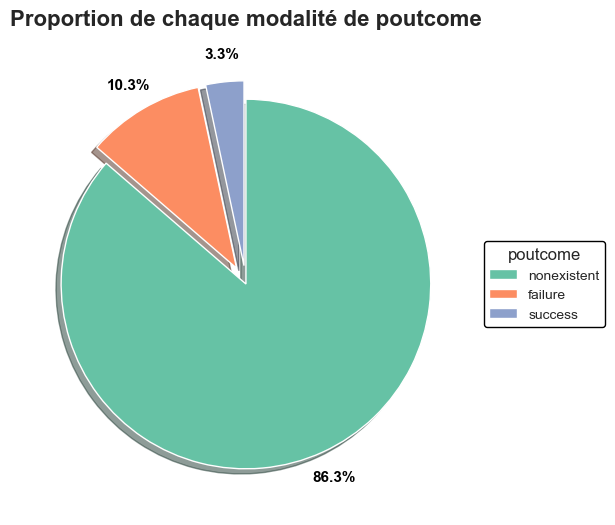

In [16]:
plot_pie_chart(data, 'poutcome', 'Proportion de chaque modalité de poutcome', explode_cats=['success', 'failure'])

**Interprétation**

La variable `poutcome` indique l’issue de la campagne marketing précédente et comporte trois modalités. La majorité des clients, soit **86,3 %**, appartiennent à la modalité `nonexistent`, ce qui signifie qu’ils n’avaient pas été contactés auparavant.<br> Parmi les clients ayant participé à une campagne antérieure, **10,3 %** n'ont pas souscrit (`failure`), tandis que seulement **3,3 %** ont abouti à une souscription réussie (`success`). Cette distribution souligne que la grande majorité de la population prospectée était constituée de nouveaux clients, et que les campagnes précédentes ont enregistré un **faible taux de conversion**, un facteur clé à considérer pour l’évaluation de l’efficacité globale des actions marketing.

#### y

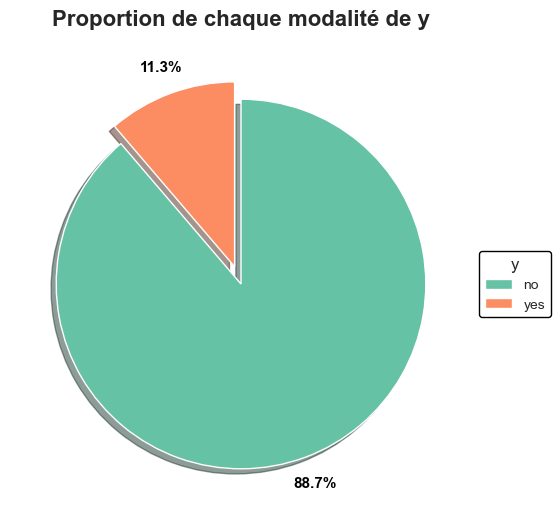

In [17]:
plot_pie_chart(data, 'y', 'Proportion de chaque modalité de y', explode_cats=['yes'])

**Interprétation**

La variable `y` constitue la **variable cible** du jeu de données et indique si le client a souscrit à un dépôt à terme à l’issue de la campagne. Elle comporte deux modalités :
* `no` : la majorité des clients, soit **88,7 %**, n'ont pas souscrit.
* `yes` : seuls **11,3 %** des clients ont accepté de souscrire à un dépôt à terme.

Cette répartition met en évidence un **déséquilibre marqué des classes**, caractéristique typique des problèmes de modélisation en marketing prédictif. Le faible taux de conversion observé (environ 1 client sur 9) souligne la difficulté de convaincre les clients de souscrire à ce type de produit financier et la nécessité d’adopter des stratégies ciblées pour améliorer l’efficacité des campagnes.

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
⚠️ Partie 3 : Qualité des données
</div>

### ❓ Données manquantes

**Note**

Le jeu de données ne contient pas de valeurs manquantes explicites telles que `NaN`, `None`, `null` ou `NA`. Cependant, certaines variables incluent la modalité `unknown`, qui représente des **données manquantes implicites** correspondant aux clients n’ayant pas souhaité renseigner certaines informations (profession, éducation, crédit, etc.).<br> L’objectif consiste donc à **compter le nombre total de valeurs manquantes implicites** présentes dans le jeu de données. 

In [18]:
# Décompte des valeurs manquantes
total_unknown = (data.select_dtypes(include='object')
                   .apply(lambda col: col.str.lower().eq('unknown').sum())
                   .sum())
print("Nombre total de 'unknown' :", total_unknown)

Nombre total de 'unknown' : 12718


**Interprétation**

L’analyse met en évidence un total de **12 718 valeurs manquantes implicites** dans le jeu de données, soit un taux de **30,9 %**. Ce volume est significatif et peut avoir un impact majeur sur la qualité des analyses ainsi que sur la performance des modèles prédictifs.<br> Il sera donc indispensable de **porter une attention particulière à ces valeurs manquantes** et de définir des règles de gestion adaptées, telles que :
* le recodage de certaines modalités manquantes si elles peuvent être interprétées,
* l'imputation statistique (par la moyenne, la médiane ou les méthodes plus avancées),
* ou encore l'exclusion de certaines variables ou observations, si leur proportion de données manquantes compromet leur exploitation.

Une stratégie claire de traitement des valeurs manquantes est essentielle pour garantir la fiabilité des résultats et éviter tout biais dans les analyses.

### 🚨 Données aberrantes

**Note**

À la suite des analyses précédentes, il apparaît plus pertinent de recourir à des **règles métier** pour identifier les données aberrantes, plutôt que de s’appuyer uniquement sur des tests statistiques classiques. En effet, dans le cadre d’une **campagne marketing**, certaines anomalies ne peuvent être correctement mises en évidence par des méthodes purement statistiques.<br> Par exemple, la variable `duration` (durée des appels) peut être considérée comme aberrante lorsque la durée dépasse **5 minutes**, seuil au-delà duquel un appel sort du cadre habituel d’une prospection téléphonique. De même, il n’est pas envisageable d’avoir des clients **âgés de moins de 17 ans**, ce qui constitue également une incohérence métier. <br> Ainsi, l’identification des valeurs aberrantes reposera principalement sur des **règles expertes et contextuelles**, définies en fonction de la logique métier et des contraintes propres au domaine bancaire et marketing, plutôt que sur de simples critères statistiques de dispersion.

In [19]:
# Filtre pour les données aberrantes
outliers = data[
    (data['age'] < 18) |        # âge < 18
    (data['duration'] > 300) |  # durée > 300
    (data['campaign'] > 5) |    # campagnes > 5
    (data['previous'] > 5)      # previous > 5
]

# Nombre de clients aberrants
print("Nombre de clients avec valeurs aberrantes :", len(outliers))

Nombre de clients avec valeurs aberrantes : 13927


**Interprétation**

L’analyse des données a permis d’identifier un total de **13 927 valeurs aberrantes**, soit environ **33,8 %** du jeu de données. Ce volume est relativement important et souligne la nécessité de **porter une attention particulière à ces anomalies** avant toute analyse ou modélisation.<br> Ces valeurs aberrantes reflètent des **observations inhabituelles ou incohérentes** par rapport aux règles métier. Par exemple :
* **Durée des appels** (`duration`) dépassant 5 minutes, ce qui sort du cadre d'une prospection téléphonique standard.
* **Âge des clients** inférieur à 17 ans, ce qui est impossible dans le cadre légal des souscriptions bancaires.
* **Nombre d'appels** adressés à un même client dans le cadre de la campagne supérieur à 5, pouvant indiquer un harcèlement téléphonique.

La prise en compte de ces anomalies est essentielle pour garantir la qualité des analyses, éviter les biais et améliorer la fiabilité des modèles prédictifs. Il sera donc nécessaire de définir et d’appliquer des règles de traitement adaptées à chaque type de valeur aberrante détectée.

### 📝 Résumé sur la qualité des données

In [20]:
# Volume total du Dataframe
total_rows = len(data)

# Calcul des KPI

quality_kpi = {
    'KPI' : ['Completeness', 'Validity'],
    'Volume' : [
        total_rows - total_unknown,        # Nombre de valeurs présentes 
        total_rows - len(outliers)         # Nombre de lignes cohérentes (hors outliers)
    ],
    'Taux (%)' : [
        (total_rows - total_unknown) / total_rows * 100,
        (total_rows - len(outliers)) / total_rows * 100
    ]
}

# Création du DataFrame
quality_data = pd.DataFrame(quality_kpi)

# Arrondi du taux à 1 chiffre après la virgule
quality_data['Taux (%)'] = quality_data['Taux (%)'].round(1)

# Affichage
quality_data

,KPI,Volume,Taux (%)
0,Completeness,28470,69.1
1,Validity,27261,66.2


<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🧩 Partie 4 : Gestion des données
</div>

### Valeurs manquantes

**Variables avec la modalité** `unknown`

La modalité `unknown` (absence de réponse volontaire du client) sera traitée comme suit :
* **Transformation en valeur manquante explicite** (`missing`), afin d’éviter le biais qu’entraînerait une suppression pure et simple des enregistrements.
* **Création d’un indicateur binaire** dédié pour chaque variable concernée (`job`, `marital`, `education`, `default`, `housing`, `loan`), signalant au modèle la présence d’une information non renseignée.

Cette stratégie permet d’améliorer la robustesse prédictive en intégrant le fait que le non-renseignement peut constituer un signal comportemental pertinent (par exemple, une réticence à divulguer certaines informations financières ou personnelles).

### Valeurs aberrantes

#### age

Les enregistrements relatifs à des individus **âgés de moins de 18 ans** seront **exclus** du jeu de données. Cette décision repose sur le fait que les mineurs ne disposent pas de la capacité légale pour contracter un produit bancaire tel qu’un dépôt à terme.

L’exclusion de ces observations présente un double avantage :
* **Assurer la conformité réglementaire** en éliminant des profils qui ne correspondent pas à la clientèle éligible.
* **Améliorer la qualité analytique** en supprimant des cas incohérents susceptibles d'introduire du bruit et de compromettre la robustesse des modèles prédictifs.

#### duration

La suppression des durées d'appels supérieures à **300 secondes** risquerait de conduire à :
1. **une perte d'information** : ces enregistrements peuvent contenir des signaux pertinents sur le comportement ou l'engagement des clients.
2. **un biais potentiel** : éliminer systématiquement ces valeurs pourrait modifier artificiellement la distribution des durées d'appel et réduire la capacité du modèle à généraliser.

Pour concilier robustesse statistique et conservation de l'information, la stratégie retenue repose sur deux actions complémentaires :
1. **Création d'un indicateur binaire (flag)**
    * Une nouvelle variable signale les cas où la durée initiale excédait 300 secondes.
    * Cet indicateur fournit au modèle une information additionnelle sur le caractère atypique de l’appel.
2. **Winsorisation des valeurs**
    * Les durées d’appel supérieures à 300 secondes sont ramenées à ce seuil maximal.
    * Cette approche permet de réduire l’influence disproportionnée des valeurs extrêmes, tout en conservant les enregistrements dans l’échantillon.

#### campaign et previous

Pour les variables `campaign` et `previous`, la même logique que celle adoptée pour la variable `duration` sera appliquée, afin de limiter l’influence des valeurs extrêmes tout en préservant l’information :
1. **Création d'un indicateur binaire (flag)**
    * Une variable additionnelle sera créée pour identifier les clients ayant reçu plus de 5 appels.
    * Cet indicateur permettra au modèle de capter le caractère inhabituel de ces situations.
2. **Winsorisation des valeurs**
    * Le nombre d’appels par client sera plafonné à 5.
    * Ainsi, toute valeur supérieure à ce seuil sera ramenée à 5, évitant que des cas atypiques de démarchage excessif biaisent la distribution.

#### pdays

Les observations présentant la valeur **999** (indiquant l’absence de contact antérieur) feront l’objet d’un traitement spécifique :
* **Création d'un indicateur binaire** afin de signaler explicitement au modèle les clients n’ayant jamais été contactés auparavant.
* **Remplacement de la valeur 999 par la médiane** des autres observations, garantissant ainsi une distribution exploitable et cohérente de la variable.

Cette approche permet à la fois de préserver l’information discriminante liée à l’absence de contact et d’éviter la distorsion statistique qu’entraînerait le maintien d’une valeur arbitraire.

### Autres transformations

####  poutcome

* **Remplacement de la modalité** `nonexistent` par une **modalité explicite** `no_previous_contact`, reflétant clairement l’absence de contact lors d’une campagne précédente.
* Cette transformation permet une interprétation plus transparente de la variable, en éliminant toute ambiguïté liée au terme nonexistent.
* Elle favorise également une meilleure exploitation par les algorithmes de classification, en distinguant explicitement les clients sans antécédent de prospection de ceux ayant déjà eu un retour positif (`success`) ou négatif (`failure`).